In [2]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
import numpy as np
from scipy.stats import norm
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
import pandas as pd

import statsmodels.api as sm
from statsmodels.formula.api import ols

# apply linear regression on the following data
data = pd.read_csv('/Users/haddock_ana/Ironhack/Unit 7 - Machine Learning/lab-ML-1/Data/marketing_customer_analysis.csv') 
data.tail()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
9133,Y167826,California,2611.836866,No,Extended,College,2/14/11,Unemployed,M,0,...,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


In [5]:
def get_numerical (df):
    numerical = df._get_numeric_data()
    return numerical
# numerical = df.select_dtypes(include=np.number)

In [11]:
numerical = get_numerical(data)

In [7]:
def get_categorical (df):
    categorical = df.select_dtypes('object')
    return categorical

#categoricals = df.select_dtypes(include=np.object)

In [12]:
categorical = get_categorical(data)

In [14]:
def get_histograms (df):
    for i in df:
        sample_mean = df[i].mean()
        sns.histplot(df[i], bins=20)
        plt.axvline(sample_mean, label= "media", c="red")
        plt.legend()
        plt.show()

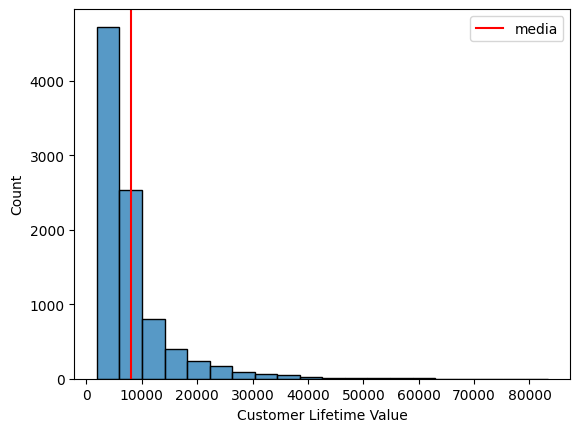

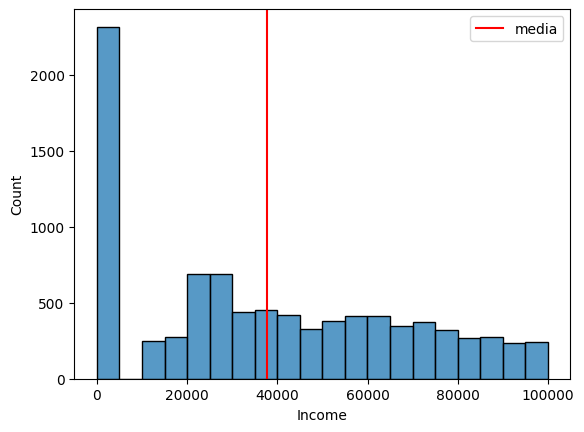

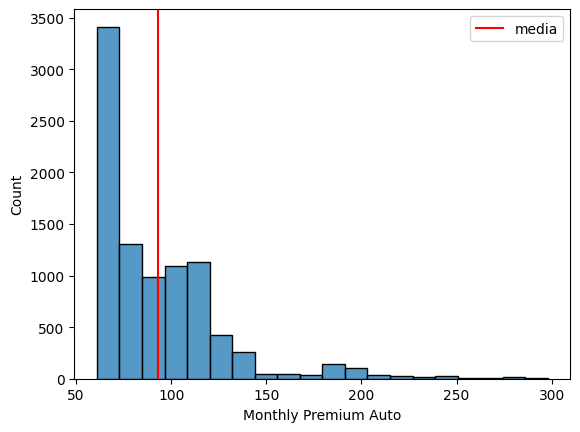

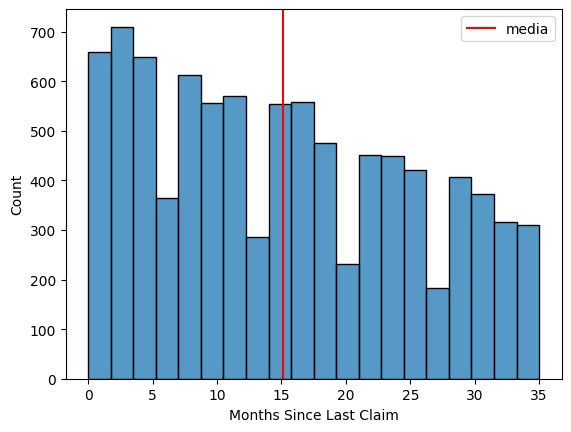

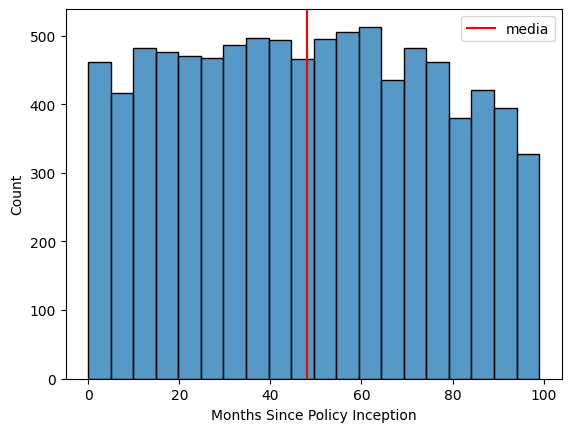

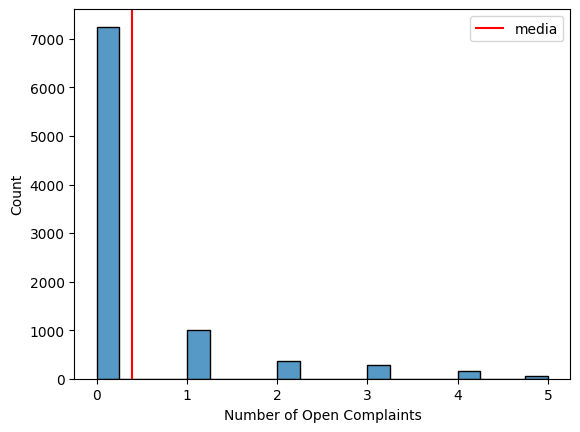

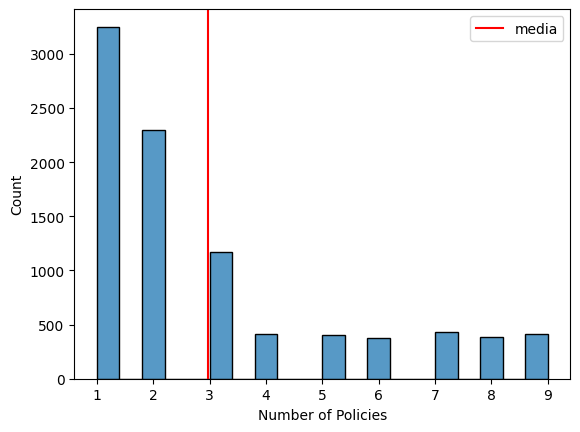

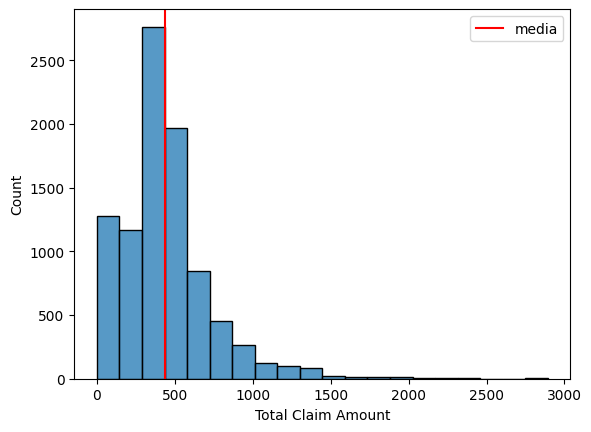

In [15]:
get_histograms(numerical)

# Correlation Analysis

In [16]:
corr = numerical.corr()
corr

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [18]:
def get_most_correlated (df):
    for col in df.columns:
        for i in df.columns[df.columns > col]:
            correlation = df.loc[col, i]
            # Check if correlation is higher than 0.8 but lower than 1
            if 0.8 < correlation < 1:
                print(f"Correlation between {col} and {i}: {correlation}")

In [19]:
get_most_correlated(corr)

In [20]:
def get_min_max_correlated(df):
    max_corr = -1
    min_corr = 1
    max_pair = ()
    min_pair = ()
    
    for col in df.columns:
        for other_col in df.columns[df.columns > col]:
            correlation = df.loc[col, other_col]
            if correlation != 1:  # Exclude correlations of 1
                if correlation > max_corr:
                    max_corr = correlation
                    max_pair = (col, other_col)
                if correlation < min_corr:
                    min_corr = correlation
                    min_pair = (col, other_col)
    
    return max_pair, max_corr, min_pair, min_corr


In [21]:
get_min_max_correlated(corr)

(('Monthly Premium Auto', 'Total Claim Amount'),
 0.6320166625194117,
 ('Income', 'Total Claim Amount'),
 -0.3552543173971929)

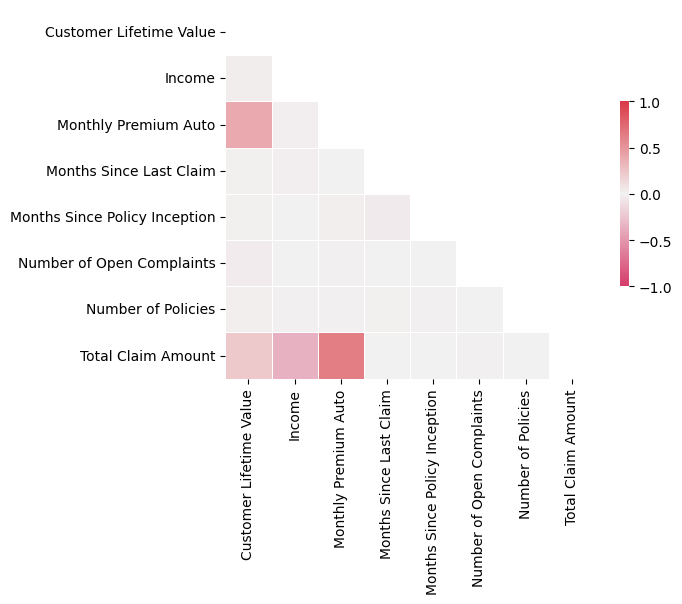

In [22]:
mask = np.triu(np.ones_like(corr, dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True)
sns.heatmap(corr,  
            mask = mask,
            cmap=color_map,
            square=True, 
            linewidth=0.5,
            vmax=1, #defining max range
            vmin=-1, #defining min range
            cbar_kws={"shrink": .5} #steps for the scale
);

### Statsmodels

In [23]:
Y = numerical['Total Claim Amount']
X = numerical.drop (['Total Claim Amount'], axis=1)

X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1405.
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:13:32   Log-Likelihood:                -61425.
No. Observations:                9134   AIC:                         1.229e+05
Df Residuals:                    9126   BIC:                         1.229e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Coef: it is the measurement of how change in that variable affects the independent variable. It is the ‘m’ in ‘y = mx + b’ One unit of change in the dependent variable will affect the variable’s coefficient’s worth of change in the independent variable. If the coefficient is negative, they have an inverse relationship. As one rises, the other falls.

* The highest variable is the Monthly Premium Auto. (Premium raises complains)

Std err: A low std error compared to a high coefficient produces a high t statistic, which signifies a high significance for your coefficient.

P> |t|: The p value of an independent variable is saying there is a xx% chance the variable has no affect on the dependent variable, and our results are produced by chance. 

* The most significant variables are: Income and Monthly Premium Auto

### Sklearn 

In [26]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

predictions = lm.predict(X)
print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)
predictions = lm.predict(X)
mse = mean_squared_error(Y, predictions)
print("The mse of the model is = ",mse) 

R2 value is =  0.52
The intercept of the model is =  72.39096819184215
The coefficients of the model are =  [ 0.00000000e+00 -6.74723453e-04 -3.29341526e-03  5.34254540e+00
 -1.45721018e-01 -1.02321926e-01 -1.37160695e+00  2.48565252e-01]
The mse of the model is =  40615.74326224916


### Conclutions
* R2 value is =  0.52 -> 52% can be explained by the independent variables
* An R2 value of 0.52 suggests a moderate level of explanatory power
* The highest coef variable is the Monthly Premium Auto. Suggesting a Premium monthly rate raises the number of total complains.
* The most significant variables are: Income and Monthly Premium Auto